# Cargar el dataset definido en los notebooks anteriores

Dataset limpio cargado. Forma: (490414, 14)

--- Serie Temporal Agregada (Diaria) ---
            Venta_Neta_GTQ
Fecha                     
2022-01-01        34719.97
2022-01-02        35097.72
2022-01-03        17395.31
2022-01-04        18963.66
2022-01-05        19242.43

Generando gráficas de autocorrelación...


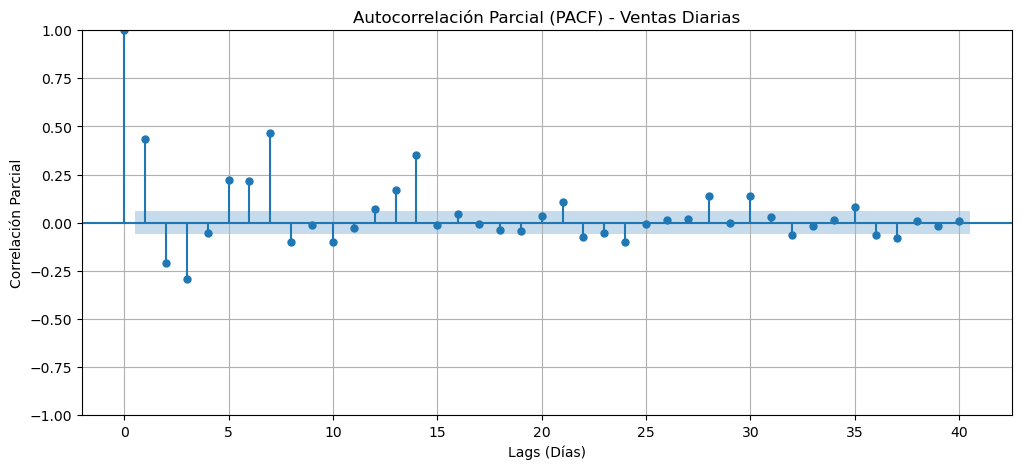

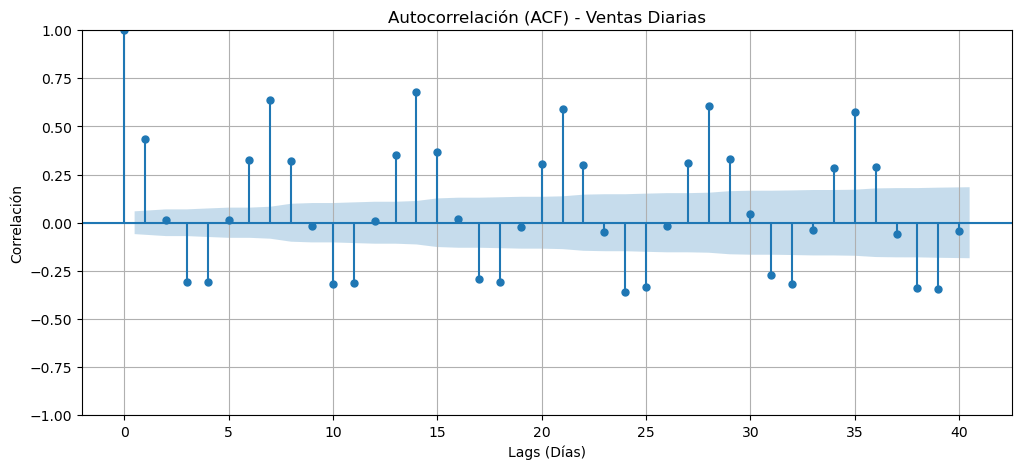

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- 1. Cargar el dataset limpio ---

PROJECT_ROOT = Path.cwd().parent
PROCESSED_DATA_PATH = PROJECT_ROOT / "data" / "processed"
CLEAN_DATA_FILEPATH = PROCESSED_DATA_PATH / "ventas_limpio.csv"

# Cargar el dataset limpio, parseando la columna 'Fecha'
df_limpio = pd.read_csv(CLEAN_DATA_FILEPATH, parse_dates=['Fecha'])

print(f"Dataset limpio cargado. Forma: {df_limpio.shape}")


# --- 2. Crear la Serie Temporal (Agregación Diaria) ---

df_daily = df_limpio.groupby('Fecha')['Venta_Neta_GTQ'].sum().reset_index()

# Convertir 'Fecha' en el índice de la serie temporal
df_daily = df_daily.set_index('Fecha')
# Asegurarse de que la serie temporal tenga una frecuencia diaria
df_daily = df_daily.asfreq('D').fillna(0)

print("\n--- Serie Temporal Agregada (Diaria) ---")
print(df_daily.head())


# --- 3. Determinar Lags (Análisis de Autocorrelación) ---

N_LAGS = 40

print("\nGenerando gráficas de autocorrelación...")

# Configurar el tamaño de las figuras
plt.rcParams["figure.figsize"] = (12, 5)

# --- Gráfica PACF (Autocorrelación Parcial) ---
fig, ax = plt.subplots()
plot_pacf(df_daily['Venta_Neta_GTQ'], lags=N_LAGS, ax=ax, method='ywm')
ax.set_title('Autocorrelación Parcial (PACF) - Ventas Diarias')
ax.set_xlabel('Lags (Días)')
ax.set_ylabel('Correlación Parcial')
plt.grid(True)
plt.show()

# --- Gráfica ACF (Autocorrelación) ---
fig, ax = plt.subplots()
plot_acf(df_daily['Venta_Neta_GTQ'], lags=N_LAGS, ax=ax)
ax.set_title('Autocorrelación (ACF) - Ventas Diarias')
ax.set_xlabel('Lags (Días)')
ax.set_ylabel('Correlación')
plt.grid(True)
plt.show()

# b. Procesos de ingeniería de características

In [3]:
# Agregamos por día
df_daily = df_limpio.groupby('Fecha')['Venta_Neta_GTQ'].sum().reset_index()
df_daily = df_daily.set_index('Fecha').asfreq('D').fillna(0).reset_index()

# --- Crear Features Categóricas (de nuestro EDA) ---
df_daily['Dia_Semana'] = df_daily['Fecha'].dt.day_name()
df_daily['Mes'] = df_daily['Fecha'].dt.month_name()

print("--- DataFrame Original Agregado ---")
print(df_daily.head())
print(f"\nForma: {df_daily.shape}")

# --- Crear una copia para la demostración ---
df_demo = df_daily.copy()

--- DataFrame Original Agregado ---
       Fecha  Venta_Neta_GTQ Dia_Semana      Mes
0 2022-01-01        34719.97   Saturday  January
1 2022-01-02        35097.72     Sunday  January
2 2022-01-03        17395.31     Monday  January
3 2022-01-04        18963.66    Tuesday  January
4 2022-01-05        19242.43  Wednesday  January

Forma: (1096, 4)


In [7]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler

# --- i. Imputación Numérica ---

# Forzar la necesidad: Eliminar 5% de los datos numéricos
print(f"\n--- i. Imputación Numérica ---")
print(f"Ventas (antes): {df_demo['Venta_Neta_GTQ'].isna().sum()} nulos")
df_demo.loc[df_demo.sample(frac=0.05, random_state=42).index, 'Venta_Neta_GTQ'] = np.nan
print(f"Ventas (forzado): {df_demo['Venta_Neta_GTQ'].isna().sum()} nulos")

# Aplicar la operación: Imputación con Mediana
median_imputer = df_demo['Venta_Neta_GTQ'].median()
df_demo['Venta_Neta_GTQ'].fillna(median_imputer, inplace=True)

print(f"Vea (después): {df_demo['Venta_Neta_GTQ'].isna().sum()} nulos")


--- i. Imputación Numérica ---
Ventas (antes): 0 nulos
Ventas (forzado): 55 nulos
Vea (después): 0 nulos


C:\Users\gabri\AppData\Local\Temp\ipykernel_17880\557963227.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_demo['Venta_Neta_GTQ'].fillna(median_imputer, inplace=True)


In [8]:
# --- ii. Imputación Categórica ---

# Forzar la necesidad: Eliminar 5% de los datos categóricos
print(f"\n--- ii. Imputación Categórica ---")
print(f"Dia_Semana (antes): {df_demo['Dia_Semana'].isna().sum()} nulos")
df_demo.loc[df_demo.sample(frac=0.05, random_state=42).index, 'Dia_Semana'] = None
print(f"Dia_Semana (forzado): {df_demo['Dia_Semana'].isna().sum()} nulos")

# Aplicar la operación: Imputación con Moda
mode_imputer = df_demo['Dia_Semana'].mode()[0]
df_demo['Dia_Semana'].fillna(mode_imputer, inplace=True)

print(f"Dia_Semana (después): {df_demo['Dia_Semana'].isna().sum()} nulos")


--- ii. Imputación Categórica ---
Dia_Semana (antes): 0 nulos
Dia_Semana (forzado): 55 nulos
Dia_Semana (después): 0 nulos


C:\Users\gabri\AppData\Local\Temp\ipykernel_17880\3429955057.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_demo['Dia_Semana'].fillna(mode_imputer, inplace=True)


In [9]:
# --- iii. Codificación Categórica ---
print(f"\n--- iii. Codificación Categórica ---")
print(f"Columnas (antes): {df_demo.columns.tolist()}")

# Aplicar la operación: One-Hot Encoding
df_demo = pd.get_dummies(df_demo, columns=['Dia_Semana', 'Mes'], drop_first=True)

print(f"Columnas (después): {df_demo.columns.tolist()}")
print(df_demo.head())


--- iii. Codificación Categórica ---
Columnas (antes): ['Fecha', 'Venta_Neta_GTQ', 'Dia_Semana', 'Mes']
Columnas (después): ['Fecha', 'Venta_Neta_GTQ', 'Dia_Semana_Monday', 'Dia_Semana_Saturday', 'Dia_Semana_Sunday', 'Dia_Semana_Thursday', 'Dia_Semana_Tuesday', 'Dia_Semana_Wednesday', 'Mes_August', 'Mes_December', 'Mes_February', 'Mes_January', 'Mes_July', 'Mes_June', 'Mes_March', 'Mes_May', 'Mes_November', 'Mes_October', 'Mes_September']
       Fecha  Venta_Neta_GTQ  Dia_Semana_Monday  Dia_Semana_Saturday  \
0 2022-01-01        34719.97              False                 True   
1 2022-01-02        35097.72              False                False   
2 2022-01-03        17395.31               True                False   
3 2022-01-04        18963.66              False                False   
4 2022-01-05        19242.43              False                False   

   Dia_Semana_Sunday  Dia_Semana_Thursday  Dia_Semana_Tuesday  \
0              False                False               Fa

In [10]:
# --- iv. Tratamiento de Outliers ---
print(f"\n--- iv. Tratamiento de Outliers ---")
print(f"Venta Máxima (antes): {df_demo['Venta_Neta_GTQ'].max():.2f}")

# Aplicar la operación: Capping con 1.5 * IQR
Q1 = df_demo['Venta_Neta_GTQ'].quantile(0.25)
Q3 = df_demo['Venta_Neta_GTQ'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Creamos una nueva columna para ver la diferencia
df_demo['Venta_GTQ_capped'] = np.where(
    df_demo['Venta_Neta_GTQ'] > upper_bound, 
    upper_bound, 
    df_demo['Venta_Neta_GTQ']
)

print(f"Límite superior (Q3 + 1.5*IQR): {upper_bound:.2f}")
print(f"Venta Máxima (después): {df_demo['Venta_GTQ_capped'].max():.2f}")


--- iv. Tratamiento de Outliers ---
Venta Máxima (antes): 66582.90
Límite superior (Q3 + 1.5*IQR): 48742.69
Venta Máxima (después): 48742.69



--- v. Transformación Numérica ---


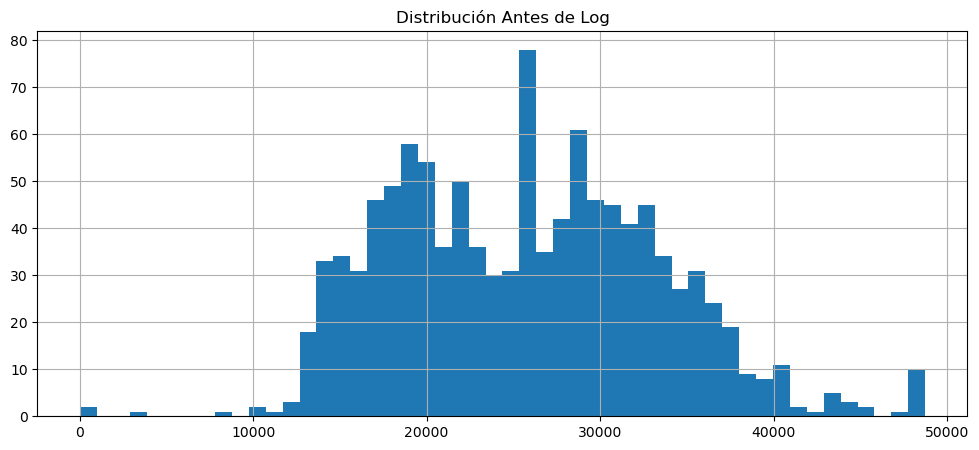

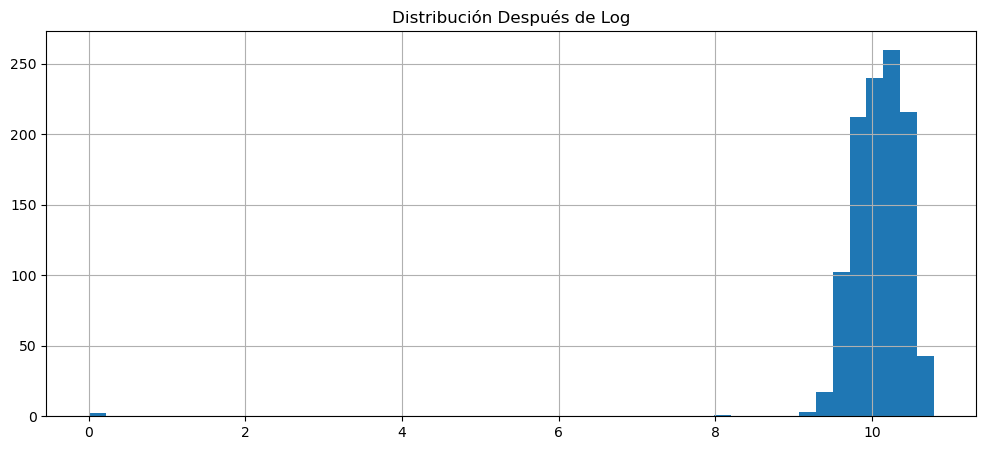

Variable 'Venta_GTQ_log' creada.


In [13]:
# --- v. Transformación Numérica ---
print(f"\n--- v. Transformación Numérica ---")

# Graficar la distribución original 
df_demo['Venta_GTQ_capped'].hist(bins=50)
plt.title('Distribución Antes de Log')
plt.show()

# Aplicar la operación: Log(1+x)
df_demo['Venta_GTQ_log'] = np.log1p(df_demo['Venta_GTQ_capped'])

# Graficar la distribución transformada 
df_demo['Venta_GTQ_log'].hist(bins=50)
plt.title('Distribución Después de Log')
plt.show()

print("Variable 'Venta_GTQ_log' creada.")

In [14]:
# --- vi. Escalado de Características ---
print(f"\n--- vi. Escalado de Características ---")

# Inicializar el scaler
scaler = StandardScaler()

# Aplicar la operación: StandardScaler
df_demo['Venta_GTQ_scaled'] = scaler.fit_transform(df_demo[['Venta_GTQ_log']])

print("Variable 'Venta_GTQ_scaled' creada.")
print("\n--- Estadísticas de la Columna Escalada ---")
print(f"Media: {df_demo['Venta_GTQ_scaled'].mean():.2f}")
print(f"Std Dev: {df_demo['Venta_GTQ_scaled'].std():.2f}")

print("\n--- Muestra del DataFrame Final ---")
print(df_demo.head())


--- vi. Escalado de Características ---
Variable 'Venta_GTQ_scaled' creada.

--- Estadísticas de la Columna Escalada ---
Media: 0.00
Std Dev: 1.00

--- Muestra del DataFrame Final ---
       Fecha  Venta_Neta_GTQ  Dia_Semana_Monday  Dia_Semana_Saturday  \
0 2022-01-01        34719.97              False                 True   
1 2022-01-02        35097.72              False                False   
2 2022-01-03        17395.31               True                False   
3 2022-01-04        18963.66              False                False   
4 2022-01-05        19242.43              False                False   

   Dia_Semana_Sunday  Dia_Semana_Thursday  Dia_Semana_Tuesday  \
0              False                False               False   
1               True                False               False   
2              False                False               False   
3              False                False                True   
4              False                False               F

# Definición del Pipeline de Pre-procesamiento

A continuación, se define la lista de transformaciones de ingeniería de características, las variables a las que se aplicarán y el mecanismo de mapeo seleccionado.

---

### i. Imputación de variables numéricas

* **Variables Afectadas:** `Venta_Neta_GTQ`
* **Mecanismo/Mapeo:** Imputación con la **Mediana**. Se eligió la mediana por ser robusta a los valores atípicos (outliers) identificados en el EDA.

---

### ii. Imputación de variables categóricas

* **Variables Afectadas:** `Dia_Semana`, `Mes` (y cualquier otra categórica futura).
* **Mecanismo/Mapeo:** Imputación con la **Moda** (el valor más frecuente). Este es el método estándar para variables categóricas nominales.

---

### iii. Codificación de variables categóricas

* **Variables Afectadas:** `Dia_Semana`, `Mes`
* **Mecanismo/Mapeo:** **One-Hot Encoding** (ej. `pd.get_dummies`). Se utiliza este método porque las variables son nominales (no tienen un orden intrínseco) y así evitamos asignarles un peso numérico incorrecto. Se usará `drop_first=True` para evitar multicolinealidad.

---

### iv. Tratamiento de outliers

* **Variables Afectadas:** `Venta_Neta_GTQ`
* **Mecanismo/Mapeo:** **Capping (Winsorizing) basado en IQR**. Los valores que superen el límite superior (`Q3 + 1.5 * IQR`) serán reemplazados por el valor de dicho límite. Esto reduce la influencia de los picos extremos sin eliminar días (lo cual es crucial en series de tiempo).

---

### v. Transformación de variables numéricas

* **Variables Afectadas:** `Venta_Neta_GTQ` (ya tratada de outliers).
* **Mecanismo/Mapeo:** **Transformación Logarítmica (`log1p`)**. El EDA mostró una distribución asimétrica (skew) en las ventas. Esta transformación ayuda a normalizar la distribución y estabilizar la varianza, mejorando el rendimiento de los modelos.

---

### vi. Escalado de características

* **Variables Afectadas:** `Venta_Neta_GTQ` (ya transformada).
* **Mecanismo/Mapeo:** **Estandarización (StandardScaler)**. Re-escala la variable para que tenga una media de 0 y una desviación estándar de 1. Es necesario para modelos sensibles a la escala de las variables (como redes neuronales o regresiones con regularización).